<a href="https://colab.research.google.com/github/Gonzales-Franz-Reinaldo/SIS421-IA2/blob/main/Laboratorios/LAB-02/LAB_02_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LABORATORIO 2 - MLP PYTORCH**

Nombre: Gonzales Suyo Franz Reinaldo

Dirección de GitHub:

##*LABORATORIO 2*

###Construir un MLP, con pytorch, considerando lo siguiente:

- El MLP, debe servir para realizar clasificaciones de al menos 5 clases o tipos de difentes ambitos.

- El MLP debe contener al menos 50 unidades  neuronales en una capa oculta.

- Se debe entrenar por almenos 1000 epochs y explicar que sucede en este proceso.

- Se debe implementar un mecanismo de checkpoints para el proceso de entrenamiento que permita respaldar los valores calculados para los parametros, cada 20 epochs.

- Aplicar las formas (frameworks) de exportación de modelos Torchscript y ONNX, a traves de ejemplos.

- Utilizar de manera obligatoria objetos dataset y dataloader en la implementacion.

- Se debe aplicar las tecnicas de normalizacion, optimizacion y buenas practicas para lograr el menor valor de costo y el mayor valor de precision.


Se debe subir todo a un repositorio el cual debes ser compartido, ademas de subir todos los cuadernillos o codigo fuente generados.

In [1]:
# IMPORTAMOS LAS LIBRERIAS

import torch
import torchvision
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import random
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm  # Importar tqdm para la barra de progreso
from torch.cuda.amp import autocast, GradScaler  # Para mixed precision training

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**1: Lectura del Dataset**

Transformaciones: Redimensionamos los imagenes a 128x128 píxeles para convierten en tensores. La normalización se realiza para que los valores de píxeles estén en un rango adecuado para el entrenamiento del modelo.

In [3]:
# Definir las transformaciones para las imágenes
transform = transforms.Compose([
    transforms.Resize((50, 50)),  # Redimensionar las imágenes a 50x50 píxeles
    transforms.ToTensor(),  # Convertir las imágenes a tensores
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizar los tensores
])

# Cargar los datasets de entrenamiento y prueba
train_data = datasets.ImageFolder(root='/content/drive/MyDrive/SIS420-IA2/Plantas Medicinales/plantas_train', transform=transform)
test_data = datasets.ImageFolder(root='/content/drive/MyDrive/SIS420-IA2/Plantas Medicinales/plantas_test', transform=transform)

# Mostrar la cantidad de imágenes de entrenamiento y prueba
print(f"Número de imágenes de entrenamiento: {len(train_data)}")
print(f"Número de imágenes de prueba: {len(test_data)}")

Número de imágenes de entrenamiento: 60000
Número de imágenes de prueba: 15000


In [5]:
# Aplicamos el objeto de dataset Dataloader para cargar los datos en batches de 64 imágenes.
trainloader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=4)
testloader = DataLoader(test_data, batch_size=64, shuffle=False, num_workers=4)

In [ ]:
from torch.utils.data import Subset

# Mostrar la cantidad de imágenes de entrenamiento y prueba
train_size = len(train_data)
test_size = len(test_data)
print(f"Número de imágenes de entrenamiento: {train_size}")
print(f"Número de imágenes de prueba: {test_size}")

# Asegurarse de que el dataset se puede dividir exactamente a la mitad
if train_size % 2 != 0 or test_size % 2 != 0:
    raise ValueError("El número de imágenes en el dataset no es par, por lo que no se puede dividir exactamente a la mitad.")

# Definir los índices para dividir el dataset a la mitad
train_midpoint = train_size // 2
test_midpoint = test_size // 2

# Dividir el dataset de entrenamiento
train_indices1 = list(range(train_midpoint))  # Primera mitad del dataset de entrenamiento
train_indices2 = list(range(train_midpoint, train_size))  # Segunda mitad del dataset de entrenamiento

# Dividir el dataset de prueba
test_indices1 = list(range(test_midpoint))  # Primera mitad del dataset de prueba
test_indices2 = list(range(test_midpoint, test_size))  # Segunda mitad del dataset de prueba

# Crear los subconjuntos usando Subset
train_data1 = Subset(train_data, train_indices1)
train_data2 = Subset(train_data, train_indices2)

test_data1 = Subset(test_data, test_indices1)
test_data2 = Subset(test_data, test_indices2)

# Verificar los tamaños de los nuevos conjuntos de datos
print("Tamaño del primer conjunto de entrenamiento:", len(train_data1))
print("Tamaño del segundo conjunto de entrenamiento:", len(train_data2))

print("Tamaño del primer conjunto de prueba:", len(test_data1))
print("Tamaño del segundo conjunto de prueba:", len(test_data2))

Número de imágenes de entrenamiento: 60000
Número de imágenes de prueba: 15000
Tamaño del primer conjunto de entrenamiento: 30000
Tamaño del segundo conjunto de entrenamiento: 30000
Tamaño del primer conjunto de prueba: 7500
Tamaño del segundo conjunto de prueba: 7500


Aplicamos la utilización de los objetos de dataset y DataLoader para poder facilitar los dataset de grandes magnitudes dividiendo en lotes de batch_size

In [ ]:
from torch.utils.data import DataLoader

# Crear DataLoaders para ambos subconjuntos de entrenamiento
train_loader1 = DataLoader(train_data1, batch_size=64, shuffle=True, num_workers=4)
test_loader1 = DataLoader(test_data1, batch_size=64, shuffle=False, num_workers=4)

In [ ]:
from torch.utils.data import DataLoader
# Crear DataLoaders para ambos subconjuntos de prueba
train_loader2 = DataLoader(train_data2, batch_size=64, shuffle=True, num_workers=4)
test_loader2 = DataLoader(test_data2, batch_size=64, shuffle=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
! pip install matplotlib


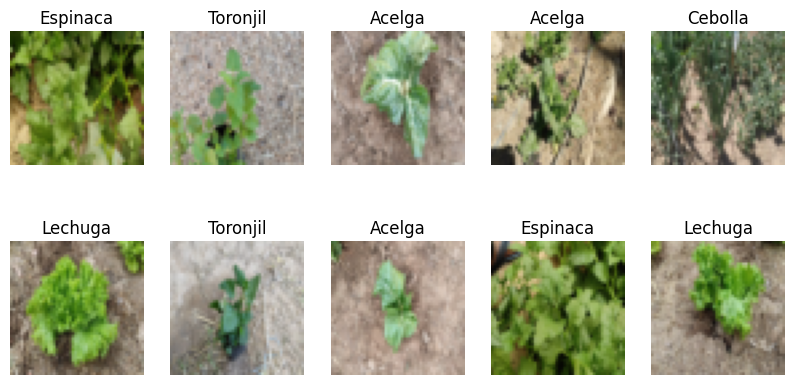

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Obtener las clases del dataset
classes = train_data.classes

# Convertir las imágenes y etiquetas a arrays numpy para facilitar el procesamiento
def imshow(img):
    img = img / 2 + 0.5     # Desnormalizar
    npimg = img.numpy()
    return np.transpose(npimg, (1, 2, 0))

# Mostrar 10 imágenes aleatorias
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    index = random.randint(0, len(train_data) - 1)
    img, label = train_data[index]
    plt.imshow(imshow(img))
    plt.title(classes[label])
    plt.axis('off')

plt.show()

#**2: Construcción del Modelo MLP**

Ahora realizaremos la arquitectura del MLP, asegurando que cumpla con las especificaciones: al menos 50 unidades neuronales en una capa oculta y una capa de salida con 5 unidades, una para cada clase de planta.

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

# Definición del modelo MLP
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()

        # Capa de aplanamiento que transforma las imágenes 2D a un vector 1D
        self.flatten = nn.Flatten()

        # Capa totalmente conectada (densa) con 50 neuronas
        self.fc1 = nn.Linear(50*50*3, 50)
        self.relu = nn.ReLU()  # Función de activación ReLU

        # Capa de Dropout con una probabilidad de 0.5 para regularización
        # Se añade una capa de Dropout en el modelo para reducir el riesgo de sobreajuste
        # al apagar aleatoriamente un porcentaje de neuronas durante el entrenamiento.
        self.dropout = nn.Dropout(0.5)

        # Capa totalmente conectada de salida con 5 neuronas (una para cada clase)
        self.fc2 = nn.Linear(50, 5)

    def forward(self, x):
        x = self.flatten(x)  # Aplanar la imagen
        x = self.fc1(x)      # Pasar por la primera capa
        x = self.relu(x)     # Aplicar la función de activación ReLU
        x = self.dropout(x)  # Aplicar Dropout para regularización
        x = self.fc2(x)      # Pasar por la capa de salida
        return x

In [7]:
# Configuración del dispositivo (GPU si está disponible)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [8]:
# Crear instancia del modelo y moverlo al dispositivo
model = MLP().to(device)

#**3: Configuración del Entrenamiento**

Entrenaremos el modelo durante 1000 epochs, implementando un mecanismo de checkpoints para guardar el modelo cada 20 epochs. Además, aplicaremos técnicas de optimización y buenas prácticas.

In [ ]:
!pip install tqdm

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm  # Importar tqdm para la barra de progreso

# Definir el criterio de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()  # Criterio de pérdida para clasificación múltiple
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizador Adam
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.7)
# torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)



# Función de entrenamiento del modelo con barra de progreso
def train(model, train_loader, criterion, optimizer, epoch):
    model.train()  # Configurar el modelo en modo de entrenamiento
    running_loss = 0.0

    # Crear una barra de progreso para el bucle de entrenamiento
    with tqdm(total=len(train_loader), desc=f"Epoch {epoch+1}", unit="batch") as pbar:

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()  # Limpiar los gradientes previos
            outputs = model(images)  # Obtener las predicciones del modelo
            loss = criterion(outputs, labels)  # Calcular la pérdida
            loss.backward()  # Realizar la retropropagación
            optimizer.step()  # Actualizar los pesos del modelo

            running_loss += loss.item() * images.size(0)

            # Actualizar la barra de progreso
            pbar.update(1)
            pbar.set_postfix(loss=running_loss / ((pbar.n + 1) * train_loader.batch_size))

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}')

In [10]:
# Función para evaluar el modelo
def evaluate(model, test_loader):
    model.eval()  # Configurar el modelo en modo de evaluación
    correct = 0
    total = 0
    with torch.no_grad():

        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

In [ ]:
epochs = 10  # Número de épocas de entrenamiento

# Entrenamiento del modelo
for epoch in range(epochs):  # Entrenar por 100 epochs
    train(model, train_loader1, criterion, optimizer, epoch)

    # Guardar checkpoints cada 20 epochs
    if (epoch + 1) % 5 == 0:
        checkpoint_path = f'/content/drive/MyDrive/SIS420-IA2/Laboratorios/LAB-02/checkpoint_epoch_{epoch + 1}.pth'
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': criterion
        }, checkpoint_path)
        print(f'Saved checkpoint at epoch {epoch + 1}')

    # Evaluar el modelo en el conjunto de prueba
    evaluate(model, test_loader1)

Epoch 1: 100%|██████████| 469/469 [07:07<00:00,  1.10batch/s, loss=0.0521]

Epoch 1, Loss: 0.0522


Test Accuracy: 99.19%


Epoch 2: 100%|██████████| 469/469 [07:20<00:00,  1.07batch/s, loss=0.0463]

Epoch 2, Loss: 0.0464


Test Accuracy: 99.31%


Epoch 3: 100%|██████████| 469/469 [07:16<00:00,  1.08batch/s, loss=0.0469]


Epoch 3, Loss: 0.0471
Test Accuracy: 98.97%


Epoch 4: 100%|██████████| 469/469 [07:04<00:00,  1.11batch/s, loss=0.0482]

Epoch 4, Loss: 0.0483


Test Accuracy: 99.20%


Epoch 5: 100%|██████████| 469/469 [07:28<00:00,  1.05batch/s, loss=0.0449]

Epoch 5, Loss: 0.0450
Saved checkpoint at epoch 5


Test Accuracy: 99.32%


Epoch 6: 100%|██████████| 469/469 [07:25<00:00,  1.05batch/s, loss=0.0431]

Epoch 6, Loss: 0.0432


Test Accuracy: 99.45%


Epoch 7: 100%|██████████| 469/469 [07:17<00:00,  1.07batch/s, loss=0.0401]

Epoch 7, Loss: 0.0402


Test Accuracy: 99.28%


Epoch 8: 100%|██████████| 469/469 [07:14<00:00,  1.08batch/s, loss=0.0385]

Epoch 8, Loss: 0.0386


Test Accuracy: 99.32%


Epoch 9: 100%|██████████| 469/469 [07:22<00:00,  1.06batch/s, loss=0.0401]

Epoch 9, Loss: 0.0403


Test Accuracy: 99.35%


Epoch 10: 100%|██████████| 469/469 [07:26<00:00,  1.05batch/s, loss=0.0392]

Epoch 10, Loss: 0.0394
Saved checkpoint at epoch 10


Test Accuracy: 99.35%


In [ ]:
epochs = 10  # Número de épocas de entrenamiento

# Entrenamiento del modelo
for epoch in range(epochs):  # Entrenar por 100 epochs
    train(model, train_loader2, criterion, optimizer, epoch)

    # Guardar checkpoints cada 20 epochs
    if (epoch + 1) % 5 == 0:
        checkpoint_path = f'/content/drive/MyDrive/SIS420-IA2/Laboratorios/LAB-02/checkpoint_MLP_{epoch + 1}.pth'
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': criterion
        }, checkpoint_path)
        print(f'Saved checkpoint at epoch {epoch + 1}')

    # Evaluar el modelo en el conjunto de prueba
    evaluate(model, test_loader2)

Epoch 1: 100%|██████████| 469/469 [24:55<00:00,  3.19s/batch, loss=0.276]

Epoch 1, Loss: 0.2764


Test Accuracy: 97.19%


Epoch 2: 100%|██████████| 469/469 [06:42<00:00,  1.17batch/s, loss=0.148]

Epoch 2, Loss: 0.1483


Test Accuracy: 98.40%


Epoch 3: 100%|██████████| 469/469 [06:26<00:00,  1.21batch/s, loss=0.116]

Epoch 3, Loss: 0.1162


Test Accuracy: 98.81%


Epoch 4: 100%|██████████| 469/469 [06:34<00:00,  1.19batch/s, loss=0.0986]

Epoch 4, Loss: 0.0989


Test Accuracy: 98.83%


Epoch 5: 100%|██████████| 469/469 [06:37<00:00,  1.18batch/s, loss=0.0922]

Epoch 5, Loss: 0.0925
Saved checkpoint at epoch 5


Test Accuracy: 98.75%


Epoch 6: 100%|██████████| 469/469 [06:38<00:00,  1.18batch/s, loss=0.0834]

Epoch 6, Loss: 0.0837


Test Accuracy: 99.11%


Epoch 7: 100%|██████████| 469/469 [06:53<00:00,  1.13batch/s, loss=0.0757]

Epoch 7, Loss: 0.0759


Test Accuracy: 99.07%


Epoch 8: 100%|██████████| 469/469 [06:41<00:00,  1.17batch/s, loss=0.0694]

Epoch 8, Loss: 0.0696


Test Accuracy: 99.17%


Epoch 9: 100%|██████████| 469/469 [06:50<00:00,  1.14batch/s, loss=0.0677]

Epoch 9, Loss: 0.0679


Test Accuracy: 99.39%


Epoch 10: 100%|██████████| 469/469 [06:54<00:00,  1.13batch/s, loss=0.0685]

Epoch 10, Loss: 0.0687
Saved checkpoint at epoch 10


Test Accuracy: 99.40%


##Haciendo las pruebas de predicción los datos de prueba

###CARGAMOS LOS MODELOS ENTRENADOS.

In [11]:
import torch
import torch.nn as nn
import copy

# Crear una instancia del modelo
model = MLP()  # Asegúrate de usar la misma arquitectura de tu modelo

# Cargar los checkpoints
checkpoint1 = torch.load('/content/drive/MyDrive/SIS420-IA2/Laboratorios/LAB-02/checkpoint_epoch_5.pth')
checkpoint2 = torch.load('/content/drive/MyDrive/SIS420-IA2/Laboratorios/LAB-02/checkpoint_epoch_10.pth')
checkpoint3 = torch.load('/content/drive/MyDrive/SIS420-IA2/Laboratorios/LAB-02/checkpoint_MLP_5.pth')
checkpoint4 = torch.load('/content/drive/MyDrive/SIS420-IA2/Laboratorios/LAB-02/checkpoint_MLP_10.pth')


<ipython-input-11-654374b1fd3d>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint1 = torch.load('/content/drive/MyDrive/SIS420-IA2/Laboratorios/LAB-02/checkpoint_e

In [13]:
# Copiar el estado del primer modelo como base
combined_state_dict = copy.deepcopy(checkpoint1['model_state_dict'])

# Promediar los pesos de todos los modelos
for key in combined_state_dict.keys():
    combined_state_dict[key] = (
        checkpoint1['model_state_dict'][key] +
        checkpoint2['model_state_dict'][key] +
        checkpoint3['model_state_dict'][key] +
        checkpoint4['model_state_dict'][key]
    ) / 4.0

# Cargar los pesos combinados en el modelo
model.load_state_dict(combined_state_dict)

# Guardar el modelo combinado
torch.save(model.state_dict(), '/content/drive/MyDrive/SIS420-IA2/Laboratorios/LAB-02/modelo_MLP.pth')
print('Modelo combinado guardado como modelo_MLP.pth')

Modelo combinado guardado como modelo_MLP.pth


Cargamos el modelo entrenado

In [14]:
import torch

# Crear una instancia del modelo (asegúrate de que la arquitectura sea la misma)
model = MLP()  # Reemplaza MLP con la clase de tu modelo si es diferente

# Cargar los pesos del modelo guardado
model.load_state_dict(torch.load('/content/drive/MyDrive/SIS420-IA2/Laboratorios/LAB-02/modelo_MLP.pth'))

# Mover el modelo al dispositivo adecuado (GPU o CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


<ipython-input-14-295c4c67f583>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/SIS420-IA2/Laboratorios/LAB-02/mode

MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=7500, out_features=50, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=50, out_features=5, bias=True)
)

PRUEBAS CON UNA IMAGEN FOTOGRÁFICA

In [15]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Definir las transformaciones para las imágenes (debe coincidir con las del entrenamiento)
transform = transforms.Compose([
    transforms.Resize((50, 50)),  # Reducir el tamaño de la imagen a 50x50 píxeles
    transforms.ToTensor(),  # Convertir las imágenes a tensores
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizar los tensores
])


In [16]:
# Función para hacer predicciones
def predict_image(image_path):
    # Cargar la imagen
    image = Image.open(image_path)

    # Aplicar las transformaciones
    image_tensor = transform(image).unsqueeze(0)  # Añadir una dimensión para el batch

    # Realizar la predicción
    with torch.no_grad():
        outputs = model(image_tensor)
        _, predicted = torch.max(outputs, 1)

    return predicted.item()



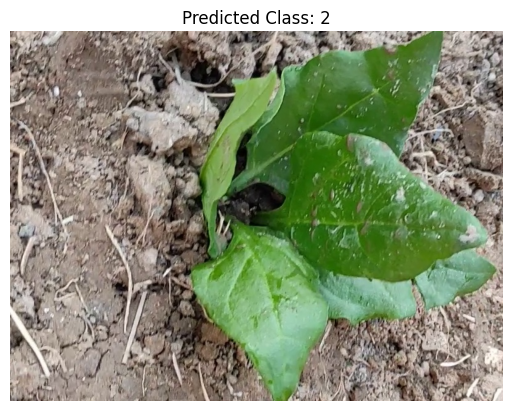

In [21]:
# Ruta de la imagen a probar
# image_path = '/content/drive/MyDrive/SIS420-IA2/Laboratorios/LAB-03/Images_prueba/acelga_08989.jpg'  # Cambia esto a la ruta de tu imagen
# image_path = '/content/drive/MyDrive/SIS420-IA2/Laboratorios/LAB-03/Images_prueba/cebolla_00386.jpg'
image_path = '/content/drive/MyDrive/SIS420-IA2/Laboratorios/LAB-03/Images_prueba/espinaca_00408.jpg'
# image_path = '/content/drive/MyDrive/SIS420-IA2/Laboratorios/LAB-03/Images_prueba/lechuga_00066.jpg'
# image_path = '/content/drive/MyDrive/SIS420-IA2/Laboratorios/LAB-03/Images_prueba/toronjil_00022.jpg'

# Obtener la clase predicha
predicted_class = predict_image(image_path)

# Mostrar la imagen y el resultado
image = Image.open(image_path)
plt.imshow(image)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()

#**4: Exportación del Modelo (TorchScript y ONNX)**

Una vez entrenado el modelo, lo exportamos a los formatos TorchScript y ONNX.

In [25]:
!pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 66.8 MB/s eta 0:00:00


In [26]:
import torch

# Exportar el modelo a TorchScript y ONNX
# TorchScript: torch.jit.trace permite exportar el modelo, manteniendo su
# estructura y lógica, lo cual es útil para implementaciones en producción.

scripted_model = torch.jit.script(model)
scripted_model.save('model_scripted.pt')

# ONNX: Proporciona interoperabilidad, permitiendo que el modelo se utilice en diferentes frameworks.
# Install onnx if you haven't already
!pip install onnx
import onnx # Import the onnx module

dummy_input = torch.randn(1, 3, 50, 50, device=device)
torch.onnx.export(model, dummy_input, 'model.onnx', verbose=True)


# Exportar a TorchScript
example_input = torch.randn(1, 3, 50, 50)  # Ejemplo de entrada
traced_script_module = torch.jit.trace(model, example_input)
traced_script_module.save("mlp_model_script.pt")

# Exportar a ONNX
torch.onnx.export(model, example_input, "mlp_model.onnx", export_params=True, opset_version=10,
                  do_constant_folding=True, input_names=['input'], output_names=['output'])

/usr/local/lib/python3.10/dist-packages/torch/jit/_trace.py:1303: TracerWarning: Output nr 1. of the traced function does not match the corresponding output of the Python function. Detailed error:
Tensor-likes are not close!

Mismatched elements: 5 / 5 (100.0%)
Greatest absolute difference: 2.669471263885498 at index (0, 2) (up to 1e-05 allowed)
Greatest relative difference: 0.8631623325763357 at index (0, 3) (up to 1e-05 allowed)
  _check_trace(


#CONCLUSIÓN Y RESULTADOS

- **HiperParámetros**: Los hiperparámetros que se utilizaron fueron el valor de alpha coeficiente de aprendizaje de 0.001.

Para el modelo del MLP utilizamos 128*128*3 de entrada, un 50 capas ocultas y la última capa de salida que es de 5 clases diferentes.


Sobre los resultamos aún no se especificó los resultados correctos ya que se hacen muchas pruebas con diferentes tipos de hiperparámetros por lo que tendremos que entrenar muchas veces para sacar el mejor resultado.

####Tecnicas y Prácticas

- Regularización: Se añadió Dropout en el modelo para reducir el sobreajuste al apagar aleatoriamente un porcentaje de neuronas durante el entrenamiento.

- Optimización: Para la optimización del modelo aplicamos un optimizador que es el Adan que adapta las tasas de aprendizaje y estabiliza el entrenamiento. Existen otros que podriamos utilizar como Learning Rate Scheduling o Gradient Clipping, pero la más famosa que se utiliza es el Adan por lo cual percatamos a utilizar para la optimización del entrenamiento.

- Buenas Prácticas:

  . Utilizamos DataLoader para manejar el batching y aleatorización de los datos de entrenamiento y prueba
  
  . Checkpoints: Guardamos el estado del modelo y el optimizador cada 20 epochs para recuperar el progreso en caso de interrupciones.

  . Exportación del Modelo: Exportamos el modelo en dos
  formatos: TorchScript para su uso en producción y ONNX para interoperabilidad con otras plataformas.


####Entrenamiento y Evaluación

- Entrenamiento: El modelo se entrena durante 1000 epochs, donde en cada epoch se realiza el forward pass, cálculo de pérdida, retropropagación y actualización de pesos. La pérdida se imprime al final de cada epoch.

- Evaluación: Después del entrenamiento de cada epoch, se evalúa el modelo en el conjunto de prueba para calcular la precisión y verificar el rendimiento.